In [1]:
import time
import platform
import sys


print(time.strftime("%Y-%m-%d %H:%M:%S"))
print(platform.platform())
print(sys.version_info)
print('《Python 3 网络爬虫开发实战》\n第四章 解析库的使用')

2019-12-12 12:07:26
Windows-10-10.0.18362-SP0
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
《Python 3 网络爬虫开发实战》
第四章 解析库的使用


In [2]:
from lxml import etree


text = '''
<div>
<ul>
<li class="item-0"><a href="link1.html">first item</a></li>
<li class="item-1"><a href="link2.html">second item</a></li>
<li class="item-inactive"><a href="link3.html">third item</a></li>
<li class="item-1"><a href="link4.html">forth item</a></li>
<li class="item-0"><a href="link5.html">fifth item</a>
'''
html = etree.HTML(text)
result = etree.tostring(html)
print(result.decode('utf-8'))

<html><body><div>
<ul>
<li class="item-0"><a href="link1.html">first item</a></li>
<li class="item-1"><a href="link2.html">second item</a></li>
<li class="item-inactive"><a href="link3.html">third item</a></li>
<li class="item-1"><a href="link4.html">forth item</a></li>
<li class="item-0"><a href="link5.html">fifth item</a>
</li></ul></div></body></html>


In [3]:
html = etree.HTML(text)
print(html)

<Element html at 0x260e897b488>


In [4]:
result = etree.tostring(html)
print(result)

b'<html><body><div>\n<ul>\n<li class="item-0"><a href="link1.html">first item</a></li>\n<li class="item-1"><a href="link2.html">second item</a></li>\n<li class="item-inactive"><a href="link3.html">third item</a></li>\n<li class="item-1"><a href="link4.html">forth item</a></li>\n<li class="item-0"><a href="link5.html">fifth item</a>\n</li></ul></div></body></html>'


In [5]:
print(result.decode('utf-8'))

<html><body><div>
<ul>
<li class="item-0"><a href="link1.html">first item</a></li>
<li class="item-1"><a href="link2.html">second item</a></li>
<li class="item-inactive"><a href="link3.html">third item</a></li>
<li class="item-1"><a href="link4.html">forth item</a></li>
<li class="item-0"><a href="link5.html">fifth item</a>
</li></ul></div></body></html>


In [9]:
from lxml import etree


html = etree.parse('./test.html', etree.HTMLParser())
result = etree.tostring(html)
print(result.decode('utf-8'))


<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html><body><div>&#13;
<ul>&#13;
<li class="item-0"><a href="link1.html">first item</a></li>&#13;
<li class="item-1"><a href="link2.html">second item</a></li>&#13;
<li class="item-inactive"><a href="link3.html">third item</a></li>&#13;
<li class="item-1"><a href="link4.html">forth item</a></li>&#13;
<li class="item-0"><a href="link5.html">fifth item</a></li></ul></div></body></html>


在 Linux 平台下，输出中没有`&#13;`，`&#13;` 对应的是双引号之间的字符 "&#13;"

In [12]:
from lxml import etree


html = etree.parse('./test.html', etree.HTMLParser())
type(html)

lxml.etree._ElementTree

In [13]:
result = html.xpath('//*')
print(result)

[<Element html at 0x260e8dfe988>, <Element body at 0x260e8dfe088>, <Element div at 0x260e8d78088>, <Element ul at 0x260e8d78288>, <Element li at 0x260e8d78308>, <Element a at 0x260e8e58b08>, <Element li at 0x260e8e41b08>, <Element a at 0x260e8e62608>, <Element li at 0x260e8e62448>, <Element a at 0x260e8e58588>, <Element li at 0x260e8e625c8>, <Element a at 0x260e8e62548>, <Element li at 0x260e8e62188>, <Element a at 0x260e8e624c8>]


In [14]:
result = html.xpath('//li')
print(result)

[<Element li at 0x260e8d78308>, <Element li at 0x260e8e41b08>, <Element li at 0x260e8e62448>, <Element li at 0x260e8e625c8>, <Element li at 0x260e8e62188>]


In [15]:
print(result[0])

<Element li at 0x260e8d78308>


In [16]:
result = html.xpath('//li/a')
print(result)

[<Element a at 0x260e8d78088>, <Element a at 0x260e8dfebc8>, <Element a at 0x260e8dfe148>, <Element a at 0x260e8e58588>, <Element a at 0x260e8e62588>]


**注意：** / 用于获取直接子节点，// 用于获取子孙节点

In [17]:
result = html.xpath('//ul//a')
print(result)

[<Element a at 0x260e8d78088>, <Element a at 0x260e8dfebc8>, <Element a at 0x260e8dfe148>, <Element a at 0x260e8e58588>, <Element a at 0x260e8e62588>]


In [18]:
result = html.xpath('//ul/a')
print(result)

[]


获取本机联网的网卡的IP地址

In [19]:
import socket


s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.connect(("114.114.114.114", 53))
s.getsockname()[0]

'192.168.1.101'

通过 Python 获取本机联网网卡的IP和MAC地址

In [20]:
import wmi


c = wmi.WMI()
sql = "select IPAddress, MACAddress, DefaultIPGateway from Win32_NetworkAdapterConfiguration where IPEnabled=1"
adapters = c.query(sql)
for dev in adapters:
    if dev.DefaultIPGateway != None:
        print(dev.IPAddress[0], dev.MACAddress)

192.168.1.101 C0:D9:62:45:20:8D


In [25]:
import wmi


c = wmi.WMI()
for adapter in c.Win32_NetworkAdapterConfiguration(IPEnabled=1):
    if adapter.DefaultIPGateway != None:
        print(adapter.IPAddress[0], adapter.MACAddress)

192.168.1.101 C0:D9:62:45:20:8D


In [23]:
sql = "select IPAddress, MACAddress, DefaultIPGateway, DNSServerSearchOrder from Win32_NetworkAdapterConfiguration where IPEnabled=1"
adapters = c.query(sql)
for dev in adapters:
    if dev.DefaultIPGateway != None:
        print("IP地址：", dev.IPAddress[0])
        print("网卡地址：", dev.MACAddress)
        print("默认网关：", dev.DefaultIPGateway[0])
        print("DNS服务器：", dev.DNSServerSearchOrder)

IP地址： 192.168.1.101
网卡地址： C0:D9:62:45:20:8D
默认网关： 192.168.1.1
DNS服务器： ('1.1.1.1', '8.8.8.8')


In [2]:
import socket


print(socket.gethostname())

YWH


In [2]:
import socket 


dir(socket)

['AF_APPLETALK',
 'AF_DECnet',
 'AF_INET',
 'AF_INET6',
 'AF_IPX',
 'AF_IRDA',
 'AF_SNA',
 'AF_UNSPEC',
 'AI_ADDRCONFIG',
 'AI_ALL',
 'AI_CANONNAME',
 'AI_NUMERICHOST',
 'AI_NUMERICSERV',
 'AI_PASSIVE',
 'AI_V4MAPPED',
 'AddressFamily',
 'AddressInfo',
 'CAPI',
 'EAGAIN',
 'EAI_AGAIN',
 'EAI_BADFLAGS',
 'EAI_FAIL',
 'EAI_FAMILY',
 'EAI_MEMORY',
 'EAI_NODATA',
 'EAI_NONAME',
 'EAI_SERVICE',
 'EAI_SOCKTYPE',
 'EBADF',
 'EWOULDBLOCK',
 'INADDR_ALLHOSTS_GROUP',
 'INADDR_ANY',
 'INADDR_BROADCAST',
 'INADDR_LOOPBACK',
 'INADDR_MAX_LOCAL_GROUP',
 'INADDR_NONE',
 'INADDR_UNSPEC_GROUP',
 'IPPORT_RESERVED',
 'IPPORT_USERRESERVED',
 'IPPROTO_ICMP',
 'IPPROTO_IP',
 'IPPROTO_RAW',
 'IPPROTO_TCP',
 'IPPROTO_UDP',
 'IPV6_CHECKSUM',
 'IPV6_DONTFRAG',
 'IPV6_HOPLIMIT',
 'IPV6_HOPOPTS',
 'IPV6_JOIN_GROUP',
 'IPV6_LEAVE_GROUP',
 'IPV6_MULTICAST_HOPS',
 'IPV6_MULTICAST_IF',
 'IPV6_MULTICAST_LOOP',
 'IPV6_PKTINFO',
 'IPV6_RECVRTHDR',
 'IPV6_RECVTCLASS',
 'IPV6_RTHDR',
 'IPV6_TCLASS',
 'IPV6_UNICAST_HOPS',


In [4]:
print(socket.getdefaulttimeout())

None


In [1]:
import socket


# the public network interface
HOST = socket.gethostbyname(socket.gethostname())

# create a raw socket and bind it to the public interface
s = socket.socket(socket.AF_INET, socket.SOCK_RAW, socket.IPPROTO_IP)
s.bind((HOST, 0))

# Include IP headers
s.setsockopt(socket.IPPROTO_IP, socket.IP_HDRINCL, 1)

# receive all packages
s.ioctl(socket.SIO_RCVALL, socket.RCVALL_ON)

# receive a package
print(s.recvfrom(65565))

# diabled promiscuous mode
s.ioctl(socket.SIO_RCVALL, socket.RCVALL_OFF)

OSError: [WinError 10013] 以一种访问权限不允许的方式做了一个访问套接字的尝试。

### 重用套接字地址

In [3]:
import socket


PORT = 8001
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
s.bind((HOST, PORT))

In [4]:
class MySocket:
    """demonstration class only 
    - coded for clarity, not efficiency
    """
    
    def __init__(self, sock=None):
        if sock is None:
            self.sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        else:
            self.sock = sock
            
    def connect(self, host, port):
        self.connect((host, port))
        
    def mysend(self, msg):
        totalsent = 0
        while totalsent < MSGLEN:
            sent = self.sock.send(msg[totalsent:])
            if sent == 0:
                raise RuntimeError("socket connection broken")
            totalsent = totalsent + sent
            
    def myreceive(self):
        chunks = []
        bytes_recd = 0
        while bytes_recd < MSGLEN:
            chunk = self.sock.recv(min(MSGLEN - bytes_recd, 2048))
            if chunk == b'':
                raise RuntimeError("socket connection broken")
            chunks.append(chunk)
            bytes_recd = bytes_recd + len(chunk)
        return b''.join(chunks)


In [1]:
%matplotlib inline

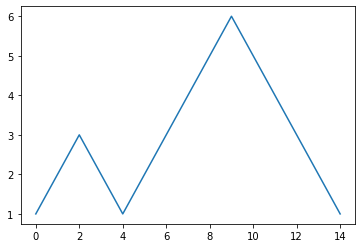

In [2]:
import matplotlib.pyplot as plt


plt.plot([1, 2, 3, 2, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])

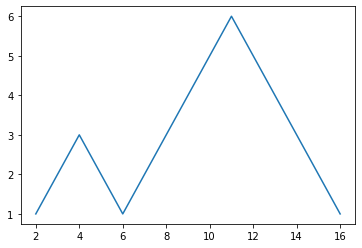

In [3]:
plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
         [1, 2, 3, 2, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])

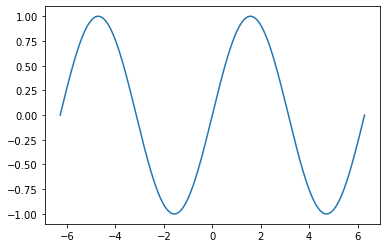

In [4]:
import numpy as np
# 导入数值计算模块


# 在-2PI和2PI之间等距生成1000个值，也就是X坐标
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
# 计算y坐标
y = np.sin(x)

plt.plot(x, y)

<BarContainer object of 3 artists>

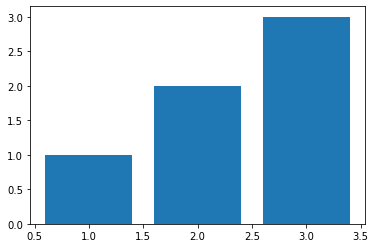

In [5]:
plt.bar([1, 2, 3], [1, 2, 3])

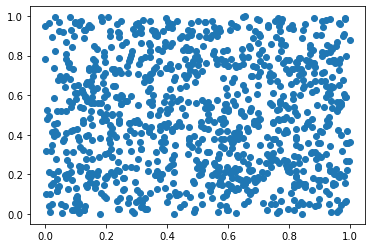

In [6]:
# x, y的坐标均有numpy在0到1中随机生成的1000个值
x = np.random.ranf(1000)
y = np.random.ranf(1000)
plt.scatter(x, y)

([<matplotlib.patches.Wedge at 0x299c18cb860>,
 [Text(1.075962358309037, 0.22870287165240302, ''),
  Text(0.7360436312779136, 0.817459340184711, ''),
  Text(-0.33991877217145816, 1.046162142464278, ''),
  Text(-1.0759623315431446, -0.2287029975759841, ''),
  Text(0.5500001932481627, -0.9526278325909777, '')])

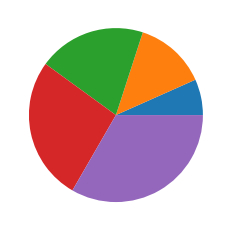

In [7]:
plt.pie([1, 2, 3, 4, 5])

In [8]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_

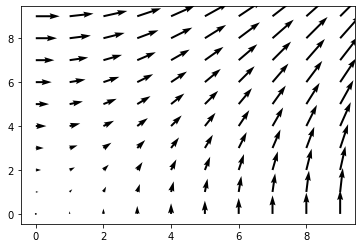

In [10]:
x,  y = np.mgrid[0:10, 0:10]
plt.quiver(x, y)

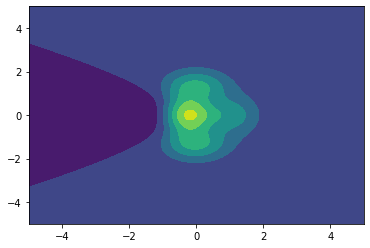

In [12]:
# 生成网格矩阵
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)
# 等高线计算公式
Z = (1 - X / 2 + X ** 3 + Y ** 4) * np.exp(-X ** 2 - Y ** 2)

plt.contourf(X, Y, Z)

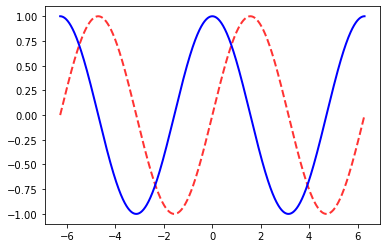

In [13]:
# 在 -2PI 和 2PI 之间等间距生成1000个值，也就是 x 坐标
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
# 计算 sin() 对应的纵坐标
y1 = np.sin(x)
# 计算 cos() 对应的纵坐标
y2 = np.cos(x)

plt.plot(x, y1, color='r', linestyle='--', linewidth=2, alpha=0.8)
plt.plot(x, y2, color='b', linestyle='-', linewidth=2)

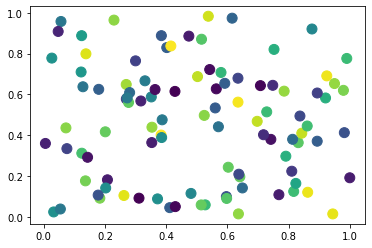

In [15]:
# 生成随机数据
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)
size = np.random.normal(100)

plt.scatter(x, y, s=size, c=colors)  # 绘制散点图

(-1.1126474248725045, 1.205364242938969, -1.282680566307163, 1.125779839003857)

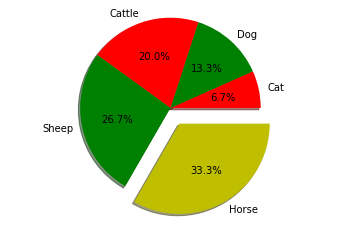

In [16]:
label = 'Cat', 'Dog', 'Cattle', 'Sheep', 'Horse'  # 各类别标签
color = 'r', 'g', 'r', 'g', 'y'  # 各类别颜色
size = [1, 2, 3, 4, 5]  # 各类别占比
explode = (0, 0, 0, 0, 0.2)  # 各类别的偏移半径
# 绘制饼状图
plt.pie(size, colors=color, explode=explode, labels=label, shadow=True, autopct='%1.1f%%')
# 饼状图呈正圆
plt.axis('equal')

d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 28857 missing 

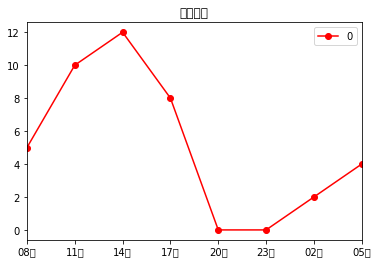

In [17]:
import pandas as pd
Temperature=pd.DataFrame([5,10,12,8,0,0,2,4],index=['08点','11点','14点','17点','20点','23点','02点','05点'])
Temperature.plot(kind='line',marker='o',color='r',title='温度变化')

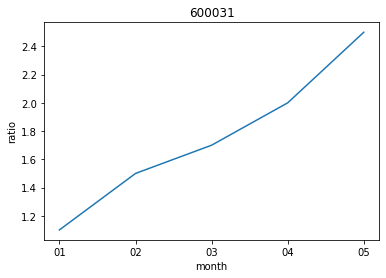

In [19]:
import matplotlib.pyplot as plt
x_data = ['01', '02', '03', '04', '05']
y_data = [1.1, 1.5, 1.7, 2.0, 2.5]
plt.plot(x_data, y_data)
plt.xlabel('month')
plt.ylabel('ratio')
plt.title('600031')
plt.show()

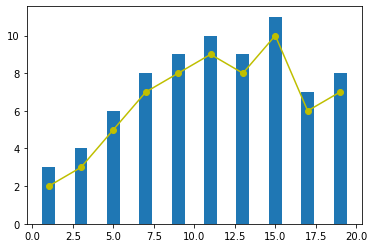

In [20]:
x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

In [2]:
%matplotlib inline

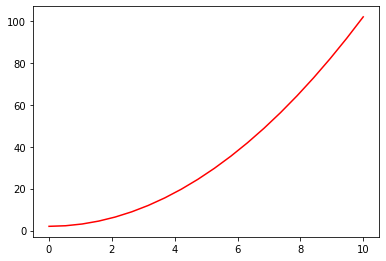

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 20)  # 生成数据
y = x * x + 2

fig = plt.figure()  # 新建图形对象
axes = fig.add_axes([0.5, 0.5, 0.8, 0.8])  # 控制画布的左，下，宽度，高度
axes.plot(x, y, 'r')

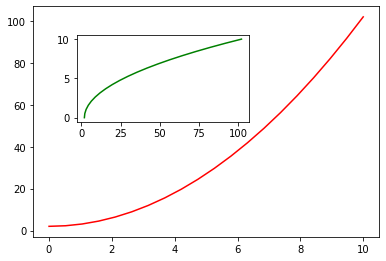

In [4]:
fig = plt.figure()  # 新建画板
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # 大画布
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])  # 小画布

axes1.plot(x, y, 'r')  # 大画布
axes2.plot(y, x, 'g')  # 小画布

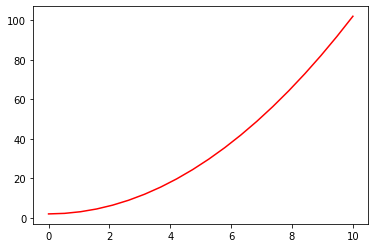

In [5]:
fig, axes = plt.subplots()
axes.plot(x, y, 'r')

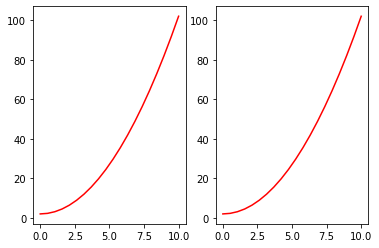

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)  # 子图为1行，2列
for ax in axes:
    ax.plot(x, y, 'r')

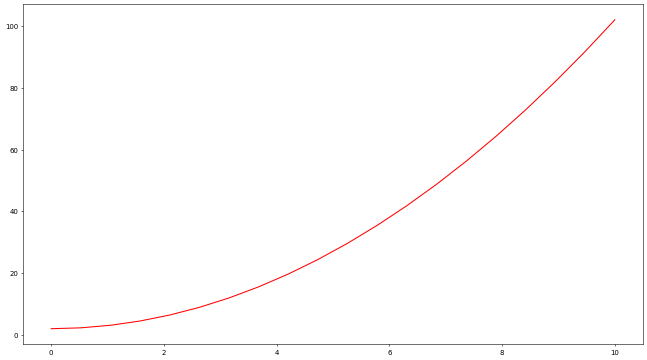

In [7]:
fig, axes = plt.subplots(figsize=(16, 9), dpi=50)  # 通过figsize调节尺寸，dpi调节显示精度
axes.plot(x, y, 'r')

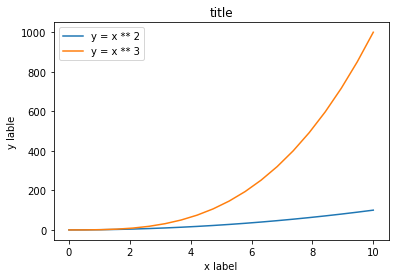

In [8]:
fig, axes = plt.subplots()

axes.set_xlabel('x label')  # 横轴名称
axes.set_ylabel('y lable')  # 纵轴名称
axes.set_title('title')  # 图形名称

axes.plot(x, x ** 2)
axes.plot(x, x ** 3)
axes.legend(["y = x ** 2", "y = x ** 3"], loc=0)  # 图例

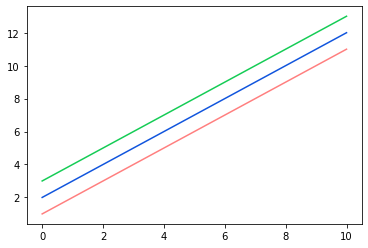

In [9]:
fig, axes = plt.subplots()

axes.plot(x, x + 1, color="red", alpha=0.5)
axes.plot(x, x + 2, color="#1155dd")
axes.plot(x, x + 3, color="#15cc55")

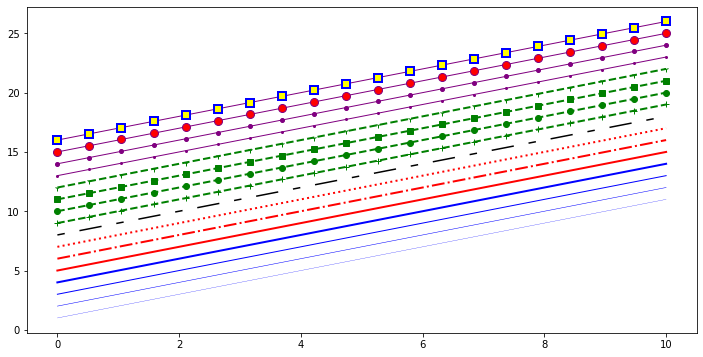

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

# 线宽
ax.plot(x, x + 1, color="blue", linewidth=0.25)
ax.plot(x, x + 2, color="blue", linewidth=0.50)
ax.plot(x, x + 3, color="blue", linewidth=1.00)
ax.plot(x, x + 4, color="blue", linewidth=2.00)

# 虚线类型
ax.plot(x, x + 5, color="red", lw=2, linestyle='-')
ax.plot(x, x + 6, color="red", lw=2, ls='-.')
ax.plot(x, x + 7, color="red", lw=2, ls=':')

# 虚线交错宽度
line, = ax.plot(x, x + 8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])

# 符号
ax.plot(x, x + 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x + 10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x + 11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x + 12, color="green", lw=2, ls='--', marker='1')

# 符号大小和颜色
ax.plot(x, x + 13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x + 14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x + 15, color="purple", lw=1, ls='-', marker='o',
        markersize=8, markerfacecolor="red")
ax.plot(x, x + 16, color="purple", lw=1, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue")

(2.0, 5.0)

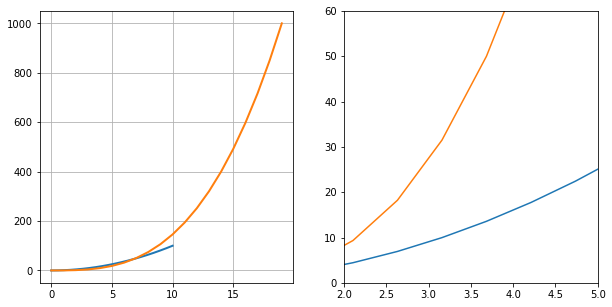

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 显示网格
axes[0].plot(x, x ** 2, x ** 3, lw=2)
axes[0].grid(True)

# 设置坐标轴范围
axes[1].plot(x, x ** 2, x, x ** 3)
axes[1].set_ylim([0, 60])
axes[1].set_xlim([2, 5])

Text(0.5, 1.0, 'fill_between')

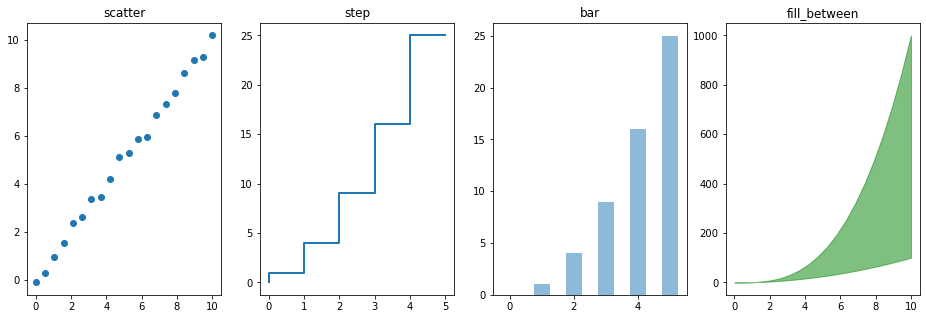

In [15]:
n = np.array([0, 1, 2, 3, 4, 5])

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

axes[0].scatter(x, x + 0.25 * np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n ** 2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n ** 2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x ** 2, x ** 3, color="green", alpha=0.5)
axes[3].set_title("fill_between")

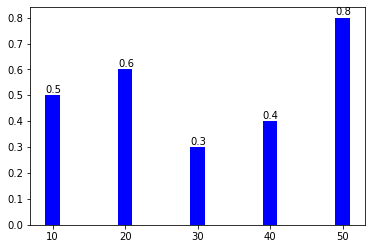

In [24]:
fig, axes = plt.subplots()

x_bar = [10, 20, 30, 40, 50]  # 柱形图横坐标
y_bar = [0.5, 0.6, 0.3, 0.4, 0.8]  # 柱形图纵坐标
bars = axes.bar(x_bar, y_bar, color='blue', label=x_bar, width=2)  # 绘制柱形图
for i, rect in enumerate(bars):
    x_text = rect.get_x()  # 获取柱形图横坐标
    y_text = rect.get_height() + 0.01  # 获取柱子的高度并增加 0.01
    # plt.text(x_text, y_text, '%.1f' % y_bar[i])  # 标注文字
    plt.text(x_text, y_text, '%.1f' % y_bar[i])  # 标注文字

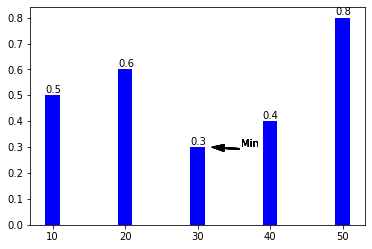

In [26]:
fig, axes = plt.subplots()

bars = axes.bar(x_bar, y_bar, color='blue', label=x_bar, width=2)  # 绘制柱形图
for i, rect in enumerate(bars):
    x_text = rect.get_x()  # 获取柱形图横坐标
    y_text = rect.get_height() + 0.01  # 获取柱子的高度并增加 0.01
    plt.text(x_text, y_text, '%.1f' % y_bar[i])  # 标注文字
    
    # 增加箭头标注
    plt.annotate('Min', xy=(32, 0.3), xytext=(36, 0.3), arrowprops=dict(facecolor='black', width=1, headwidth=7))

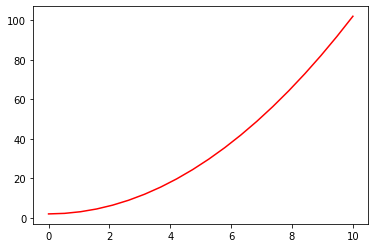

In [27]:
from matplotlib import pylab

# 使用 NumPy 生成随机数据：
x = np.linspace(0, 10, 20)
y = x * x + 2
pylab.plot(x, y, 'r')  

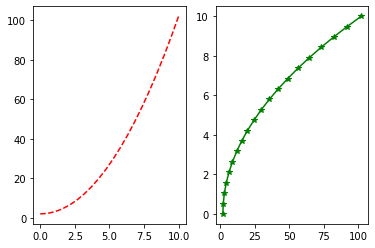

In [28]:
pylab.subplot(1, 2, 1)  # 括号中内容代表（行，列，索引）
pylab.plot(x, y, 'r--')  

pylab.subplot(1, 2, 2)
pylab.plot(y, x, 'g*-')

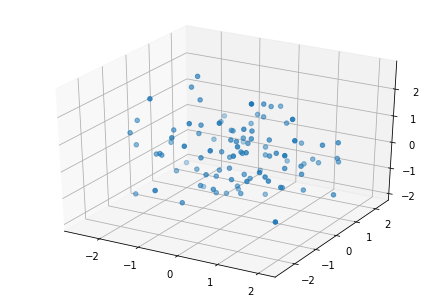

In [29]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# x, y, z 均为 0 到 1 之间的 100 个随机数
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
z = np.random.normal(0, 1, 100)

fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(x, y, z)

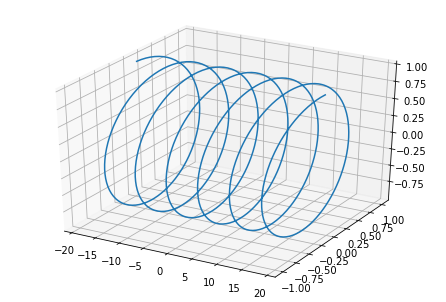

In [30]:
# 生成数据
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
y = np.sin(x)
z = np.cos(x)

# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)

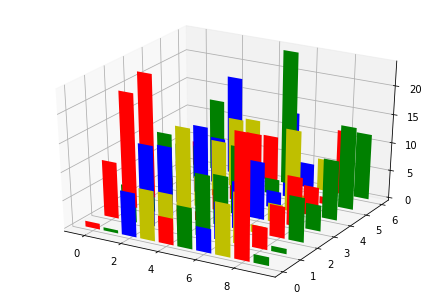

In [32]:
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 生成数据并绘图
x = [0, 1, 2, 3, 4, 5, 6]
for i in x:
    y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    z = abs(np.random.normal(1, 10, 10))
    ax.bar(y, z, i, zdir='y', color=['r', 'g', 'b', 'y'])

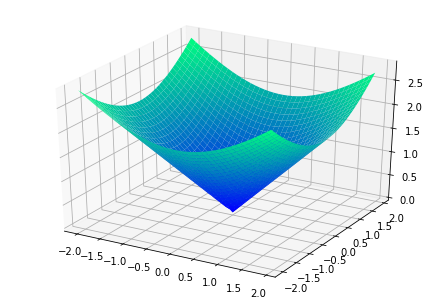

In [33]:
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 生成数据
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X ** 2 + Y ** 2)

# 绘制曲面图，并使用 cmap 着色
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)

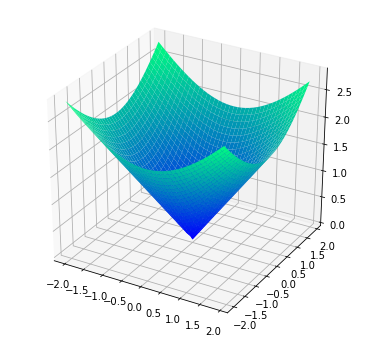

In [34]:
fig = plt.figure(figsize=(14, 6))

# 通过 projection='3d' 声明绘制 3D 图形
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)

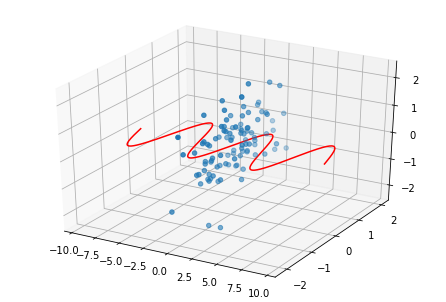

In [36]:
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 生成数据并绘制图 1
x1 = np.linspace(-3 * np.pi, 3 * np.pi, 500)
y1 = np.sin(x1)
ax.plot(x1, y1, zs=0, c='red')

# 生成数据并绘制图 2
x2 = np.random.normal(0, 1, 100)
y2 = np.random.normal(0, 1, 100)
z2 = np.random.normal(0, 1, 100)
ax.scatter(x2, y2, z2)

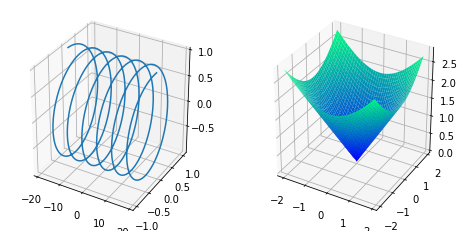

In [37]:
# 创建 1 张画布
fig = plt.figure(figsize=(8, 4))

# 向画布添加子图 1
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# 生成子图 1 数据
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
y = np.sin(x)
z = np.cos(x)
# 绘制第 1 张图
ax1.plot(x, y, z)

# 向画布添加子图 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# 生成子图 2 数据
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X ** 2 + Y ** 2)
# 绘制第 2张图
ax2.plot_surface(X, Y, Z, cmap=plt.cm.winter)

In [38]:
import tushare as ts
pro = ts.pro_api()
df = pro.hk_hold(ts_code='002008.SZ', start_date='20190101', end_date='20200508', field=('trade_date', 'name', 'ratio'))

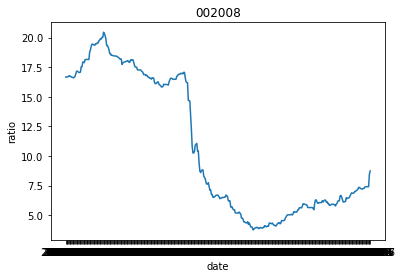

In [40]:
x = df.trade_date[::-1]
y = df.ratio[::-1]
plt.title('002008')
plt.xlabel('date')
plt.ylabel('ratio')
plt.plot(x, y)

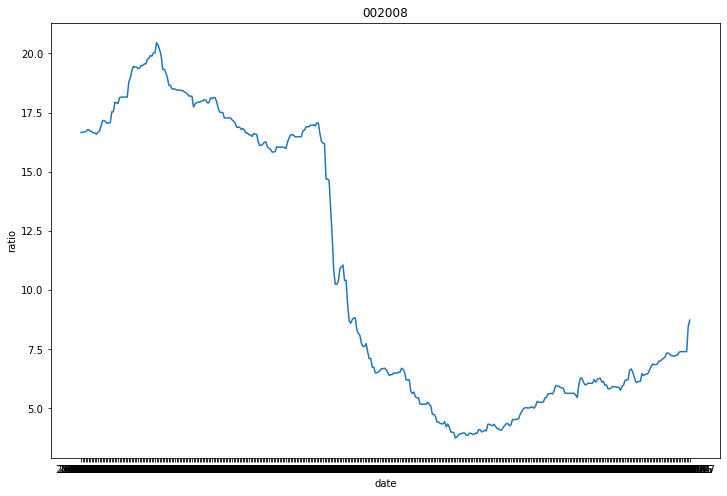

In [42]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_xlabel('date')
axes.set_ylabel('ratio')
axes.set_title('002008')
axes.plot(x, y)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


# 直线方程函数
def f_1(x, A, B):
    return A * x + B

# 二次曲线方程
def f_2(x, A, B, C):
    return A * x * x + B * x + C

# 三次曲线方程
def f_3(x, A, B, C, D):
    return A * x * x * x + B * x * x + C * x + D

def plot_text():
    plt.figure()
    
    # 拟合点
    x0 = [1, 2, 3, 4, 5]
    y0 = [1, 3, 8, 18, 36]
    
    # 绘制散点
    plt.scatter(x0[:], y0[:], 25, "red")
    
    # 直线拟合与绘制
    A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
    x1 = np.arange(0, 6, 0.01)
    y1 = A1 * x1 + B1
    plt.plot(x1, y1, "blue")
    
    # 二次曲线拟合与绘制
    A2, B2, C2 = optimize.curve_fit(f_2, x0, y0)[0]
    x2 = np.arange(0, 6, 0.01)
    y2 = A2 * x2 * x2 + B2 * x2 + C2
    plt.plot(x2, y2, "green")
    
    # 三次曲线拟合与绘制
    A3, B3, C3, D3 = optimize.curve_fit(f_3, x0, y0)[0]
    x3 = np.arange(0, 6, 0.01)
    y3 = A3 * x3 * x3 * x3 + B3 * x3 * x3 + C3 * x3 + D3
    plt.plot(x3, y3, "purple")
    
    plt.title("fitting")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.show()
    
    return

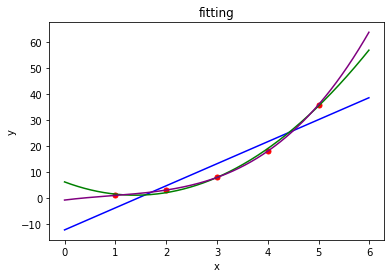

In [46]:
plot_text()

In [47]:
a = [1, 2, 3, 4, 5]
a[:]

[1, 2, 3, 4, 5]

In [48]:
a

[1, 2, 3, 4, 5]

In [49]:
L = range(10)
print(L)
print(L[::-1])
print(L)

range(0, 10)
range(9, -1, -1)
range(0, 10)


In [50]:
pro.moneyflow_hsgt(start_date='20200224', end_date='20200430')

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200428,NaN,NaN,3.26,1033.43,1036.69,0.00
1,20200427,52.35,780.97,1879.81,2058.78,3938.59,833.32
2,20200424,282.95,200.26,1562.44,1687.31,3249.75,483.21
3,20200423,134.77,1004.42,1619.98,-928.93,691.05,1139.19
4,20200422,-453.18,1421.44,693.18,484.88,1178.06,968.26
5,20200421,2340.55,724.96,-1245.52,-1507.00,-2752.52,3065.51
6,20200420,1569.98,1068.33,-766.90,816.83,49.93,2638.31
7,20200417,2805.13,1213.75,4936.61,3687.02,8623.63,4018.88
8,20200416,-289.16,232.26,1950.41,1864.10,3814.51,-56.90
9,20200415,1621.38,-58.98,890.12,2464.27,3354.39,1562.40


In [51]:
pro.moneyflow_hsgt(start_date='20200210', end_date='20200508')

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200508,-1415.81,1837.23,1317.48,3547.57,4865.05,421.42
1,20200507,-298.07,1460.66,-1310.32,-1838.10,-3148.42,1162.59
2,20200506,-1615.27,1852.48,-2320.74,3461.09,1140.35,237.21
3,20200428,NaN,NaN,3.26,1033.43,1036.69,0.00
4,20200427,52.35,780.97,1879.81,2058.78,3938.59,833.32
5,20200424,282.95,200.26,1562.44,1687.31,3249.75,483.21
6,20200423,134.77,1004.42,1619.98,-928.93,691.05,1139.19
7,20200422,-453.18,1421.44,693.18,484.88,1178.06,968.26
8,20200421,2340.55,724.96,-1245.52,-1507.00,-2752.52,3065.51
9,20200420,1569.98,1068.33,-766.90,816.83,49.93,2638.31


In [1]:
import tushare as ts


pro = ts.pro_api()
df = pro.moneyflow_hsgt(start_date='20200201', end_date='20200516')

In [2]:
df

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200515,871.53,1206.17,-111.53,1305.91,1194.38,2077.70
1,20200514,2471.56,1604.79,-1650.19,325.38,-1324.81,4076.35
2,20200513,1478.46,1915.81,26.09,-230.73,-204.64,3394.27
3,20200512,752.76,1075.14,561.87,1188.07,1749.94,1827.90
4,20200511,-2296.58,659.60,1071.89,1575.67,2647.56,-1636.98
...,...,...,...,...,...,...,...
62,20200207,1504.04,814.00,-826.83,-2472.45,-3299.28,2318.04
63,20200206,1181.51,1234.54,6083.12,4474.84,10557.96,2416.05
64,20200205,4893.69,1921.95,-786.13,477.99,-308.14,6815.64
65,20200204,3936.97,-888.60,32.09,4888.08,4920.17,3048.37


In [3]:
df = pro.moneyflow_hsgt(start_date='20200210', end_date='20200516')
df

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200515,871.53,1206.17,-111.53,1305.91,1194.38,2077.70
1,20200514,2471.56,1604.79,-1650.19,325.38,-1324.81,4076.35
2,20200513,1478.46,1915.81,26.09,-230.73,-204.64,3394.27
3,20200512,752.76,1075.14,561.87,1188.07,1749.94,1827.90
4,20200511,-2296.58,659.60,1071.89,1575.67,2647.56,-1636.98
...,...,...,...,...,...,...,...
57,20200214,1973.78,947.40,2516.56,1806.19,4322.75,2921.18
58,20200213,2165.43,702.70,807.30,-16.10,791.20,2868.13
59,20200212,3805.08,2049.98,1371.28,113.83,1485.11,5855.06
60,20200211,3042.44,1220.11,1396.65,-353.13,1043.52,4262.55


In [4]:
df = pro.moneyflow_hsgt(start_date='20200210', end_date='20200508')
df

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200508,-1415.81,1837.23,1317.48,3547.57,4865.05,421.42
1,20200507,-298.07,1460.66,-1310.32,-1838.10,-3148.42,1162.59
2,20200506,-1615.27,1852.48,-2320.74,3461.09,1140.35,237.21
3,20200428,NaN,NaN,3.26,1033.43,1036.69,0.00
4,20200427,52.35,780.97,1879.81,2058.78,3938.59,833.32
5,20200424,282.95,200.26,1562.44,1687.31,3249.75,483.21
6,20200423,134.77,1004.42,1619.98,-928.93,691.05,1139.19
7,20200422,-453.18,1421.44,693.18,484.88,1178.06,968.26
8,20200421,2340.55,724.96,-1245.52,-1507.00,-2752.52,3065.51
9,20200420,1569.98,1068.33,-766.90,816.83,49.93,2638.31


In [5]:
df.north_money.idxmax()

13

In [6]:
df.north_money[13]

14228.98

In [11]:
df.values[13]

array(['20200414', -37.06, 554.44, 4721.99, 9506.99, 14228.98, 517.38],
      dtype=object)

In [12]:
df.north_money.idxmin()

32

In [13]:
df.values[32]

array(['20200313', 10335.38, 5835.33, -10553.88, -4172.42, -14726.3,
       16170.71], dtype=object)

In [14]:
df[df['north_money'].isin([14228.98])]

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
13,20200414,-37.06,554.44,4721.99,9506.99,14228.98,517.38


In [15]:
df['north_money']

0      4865.05
1     -3148.42
2      1140.35
3      1036.69
4      3938.59
5      3249.75
6       691.05
7      1178.06
8     -2752.52
9        49.93
10     8623.63
11     3814.51
12     3354.39
13    14228.98
14        0.00
15    -3452.70
16    12673.76
17    -1943.18
18     4331.76
19     4235.00
20     1649.85
21     -125.69
22     3413.73
23    -1357.51
24     2503.86
25     3987.14
26    -7999.26
27     1686.63
28   -10220.35
29    -7191.23
30    -8238.03
31    -9807.48
32   -14726.30
33    -8380.38
34    -7465.03
35     3095.87
36   -14318.89
37    -3042.11
38     4810.62
39     -780.43
40      480.29
41     4152.01
42    -5136.80
43    -3940.50
44    -6726.89
45    -4831.34
46    -8705.14
47    -1120.08
48     3897.92
49     3744.64
50    -5390.47
51     5362.39
52     4322.75
53      791.20
54     1485.11
55     1043.52
56    -3272.34
Name: north_money, dtype: float64

In [18]:
a = df['north_money'].isin([14228.98])
a

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
Name: north_money, dtype: bool

In [19]:
df[a]

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
13,20200414,-37.06,554.44,4721.99,9506.99,14228.98,517.38


In [21]:
type(a)

pandas.core.series.Series

In [22]:
df.loc[13]

trade_date     20200414
ggt_ss           -37.06
ggt_sz           554.44
hgt             4721.99
sgt             9506.99
north_money       14229
south_money      517.38
Name: 13, dtype: object

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.loc[13].trade_date

'20200414'

In [25]:
df[13:14]

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
13,20200414,-37.06,554.44,4721.99,9506.99,14228.98,517.38


In [27]:
df[0:10]

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200508,-1415.81,1837.23,1317.48,3547.57,4865.05,421.42
1,20200507,-298.07,1460.66,-1310.32,-1838.10,-3148.42,1162.59
2,20200506,-1615.27,1852.48,-2320.74,3461.09,1140.35,237.21
3,20200428,NaN,NaN,3.26,1033.43,1036.69,0.00
4,20200427,52.35,780.97,1879.81,2058.78,3938.59,833.32
5,20200424,282.95,200.26,1562.44,1687.31,3249.75,483.21
6,20200423,134.77,1004.42,1619.98,-928.93,691.05,1139.19
7,20200422,-453.18,1421.44,693.18,484.88,1178.06,968.26
8,20200421,2340.55,724.96,-1245.52,-1507.00,-2752.52,3065.51
9,20200420,1569.98,1068.33,-766.90,816.83,49.93,2638.31


In [28]:
df = pro.moneyflow_hsgt(start_date='20200501', end_date='20200515')
df

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
0,20200515,871.53,1206.17,-111.53,1305.91,1194.38,2077.70
1,20200514,2471.56,1604.79,-1650.19,325.38,-1324.81,4076.35
2,20200513,1478.46,1915.81,26.09,-230.73,-204.64,3394.27
3,20200512,752.76,1075.14,561.87,1188.07,1749.94,1827.90
4,20200511,-2296.58,659.60,1071.89,1575.67,2647.56,-1636.98
5,20200508,-1415.81,1837.23,1317.48,3547.57,4865.05,421.42
6,20200507,-298.07,1460.66,-1310.32,-1838.10,-3148.42,1162.59
7,20200506,-1615.27,1852.48,-2320.74,3461.09,1140.35,237.21


In [30]:
from django.core.paginator import Paginator


objects = ['john', 'paul', 'george', 'ringo']
p = Paginator(objects, 2)
p.count

4

In [31]:
p.num_pages

2

In [32]:
type(p.page_range)

range

In [33]:
p.page_range

range(1, 3)

In [34]:
page1 = p.page(1)
page1

<Page 1 of 2>

In [35]:
page1.object_list

['john', 'paul']

In [36]:
page2 = p.page(2)
page2.object_list

['george', 'ringo']

In [37]:
page2.has_next()

False

In [38]:
page2.has_previous()

True

In [39]:
page2.has_other_pages()

True

In [41]:
page2.previous_page_number()

1

In [42]:
page2.start_index()  # The 1-based index of the first item on this page

3

In [43]:
page2.end_index()  # The 1-based index of the last item on this page

4

In [46]:
pro.fina_indicator(ts_code='600031.SH', start_date='20170101', end_date='20200528', 
                   fields=['ts_code', 'ann_date', 'end_date', 'roe'])

,ts_code,ann_date,end_date,roe
0,600031.SH,20200429,20200331,4.8283
1,600031.SH,20200424,20191231,29.5278
2,600031.SH,20191031,20190930,24.8159
3,600031.SH,20190830,20190630,18.9933
4,600031.SH,20190429,20190331,9.1727
5,600031.SH,20190401,20181231,21.4672
6,600031.SH,20181030,20180930,17.5036
7,600031.SH,20180827,20180630,12.6735
8,600031.SH,20180426,20180331,5.6785
9,600031.SH,20180417,20171231,8.6788


In [49]:
pro.fina_indicator(ts_code='600276.SH', start_date='20160101', end_date='20200528', 
                   fields=['ts_code', 'ann_date', 'end_date', 'npta', 'roe'])

,ts_code,ann_date,end_date,roe,npta
0,600276.SH,20200428,20200331,5.1696,4.6044
1,600276.SH,20200323,20191231,23.9443,21.3409
2,600276.SH,20191025,20190930,17.4196,15.4543
3,600276.SH,20190830,20190630,11.6272,10.3191
4,600276.SH,20190417,20190331,5.9402,5.2425
5,600276.SH,20190216,20181231,23.1685,20.1046
6,600276.SH,20181026,20180930,17.1679,15.2062
7,600276.SH,20180810,20180630,11.7743,10.2052
8,600276.SH,20180427,20180331,5.9782,5.2687
9,600276.SH,20180416,20171231,23.1782,20.3461


In [50]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, basic_eps, diluted_eps')

,ts_code,end_date,basic_eps,diluted_eps
0,600031.SH,20191231,1.3595,1.352
1,600031.SH,20191231,1.3595,1.352


In [51]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, total_revenue, revenue')

,ts_code,end_date,total_revenue,revenue
0,600031.SH,20191231,7.566576e+10,7.566576e+10
1,600031.SH,20191231,7.566576e+10,7.566576e+10


In [52]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, int_income, prem_earned')

,ts_code,end_date,int_income,prem_earned
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [53]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, comm_income, n_commis_income')

,ts_code,end_date,comm_income,n_commis_income
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [54]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, n_oth_income, n_oth_b_income')

,ts_code,end_date,n_oth_income,n_oth_b_income
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [56]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, prem_income, out_prem')

,ts_code,end_date,prem_income,out_prem
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [58]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, une_prem_reser, reins_income')

,ts_code,end_date,une_prem_reser,reins_income
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [59]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, n_sec_tb_income, n_sec_uw_income')

,ts_code,end_date,n_sec_tb_income,n_sec_uw_income
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [60]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, n_asset_mg_income, oth_b_income')

,ts_code,end_date,n_asset_mg_income,oth_b_income
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [61]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, fv_value_chg_gain, invest_income')

,ts_code,end_date,fv_value_chg_gain,invest_income
0,600031.SH,20191231,289648000.0,382852000.0
1,600031.SH,20191231,289648000.0,382852000.0


In [1]:
import tushare as ts
pro = ts.pro_api()
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, ass_invest_income, forex_gain')

,ts_code,end_date,ass_invest_income,forex_gain
0,600031.SH,20191231,139528000.0,None
1,600031.SH,20191231,139528000.0,None


In [2]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, total_cogs, oper_cost, int_exp')

,ts_code,end_date,total_cogs,oper_cost,int_exp
0,600031.SH,20191231,6.369969e+10,5.093227e+10,None
1,600031.SH,20191231,6.369969e+10,5.093227e+10,None


In [3]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, comm_exp, biz_tax_surchg, sell_exp')

,ts_code,end_date,comm_exp,biz_tax_surchg,sell_exp
0,600031.SH,20191231,None,370910000.0,5.487589e+09
1,600031.SH,20191231,None,370910000.0,5.487589e+09


In [4]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, admin_exp, fin_exp, assets_impair_loss')

,ts_code,end_date,admin_exp,fin_exp,assets_impair_loss
0,600031.SH,20191231,2.051664e+09,-46387000.0,-142448000.0
1,600031.SH,20191231,2.051664e+09,-46387000.0,-142448000.0


In [5]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, prem_refund, compens_payout')

,ts_code,end_date,prem_refund,compens_payout
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [6]:
pro.income(ts_code='600031.SH', period='20191231', fields='ts_code, end_date, reser_insur_liab, div_payt')

,ts_code,end_date,reser_insur_liab,div_payt
0,600031.SH,20191231,None,None
1,600031.SH,20191231,None,None


In [7]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, end_date, reins_exp, oper_exp, compens_payout_refu, insur_reser_refu, reins_cost_refund')

,ts_code,end_date,reins_exp,oper_exp,compens_payout_refu,insur_reser_refu,reins_cost_refund
0,600031.SH,20191231,None,None,None,None,None
1,600031.SH,20191231,None,None,None,None,None


In [8]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, end_date, other_bus_cost, operate_profit')

,ts_code,end_date,other_bus_cost,operate_profit
0,600031.SH,20191231,None,1.377543e+10
1,600031.SH,20191231,None,1.377543e+10


In [9]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, end_date, non_oper_income, non_oper_exp, nca_disploss, total_profit, income_tax')

,ts_code,end_date,non_oper_income,non_oper_exp,nca_disploss,total_profit,income_tax
0,600031.SH,20191231,182694000.0,503802000.0,None,1.345432e+10,1.959870e+09
1,600031.SH,20191231,182694000.0,503802000.0,None,1.345432e+10,1.959870e+09


In [10]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, end_date, n_income, n_income_attr_p, minority_gain')

,ts_code,end_date,n_income,n_income_attr_p,minority_gain
0,600031.SH,20191231,1.149445e+10,1.120666e+10,287786000.0
1,600031.SH,20191231,1.149445e+10,1.120666e+10,287786000.0


income 接口中的输出参数 n_income_attr_p 对应的是同花顺财务报表中的净利润

In [11]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600031.SH,20191231,1.120666e+10,0
1,600031.SH,20191231,1.120666e+10,1


In [12]:
pro.income(ts_code='600031.SH', period='20181231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600031.SH,20181231,6.116288e+09,1


In [13]:
pro.income(ts_code='600031.SH', period='20171231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600031.SH,20171231,2.092253e+09,1


In [14]:
pro.income(ts_code='600031.SH', period='20161231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600031.SH,20161231,203457000.0,0


In [17]:
df = pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')
df.count()

ts_code            2
end_date           2
n_income_attr_p    2
update_flag        2
dtype: int64

In [18]:
df.n_income_attr_p[1]

11206662000.0

In [20]:
len(df.index)

2

In [21]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [26]:
df[0:1]

,ts_code,end_date,n_income_attr_p,update_flag
0,600031.SH,20191231,1.120666e+10,0


In [27]:
df[1:2]

,ts_code,end_date,n_income_attr_p,update_flag
1,600031.SH,20191231,1.120666e+10,1


In [31]:
if len(df.index) == 2:
    print(df.n_income_attr_p[1], df.update_flag[1])

11206662000.0 1


In [32]:
pro.income(ts_code='600745.SH', period='20161231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600745.SH,20161231,47981520.13,0


In [33]:
pro.income(ts_code='600745.SH', period='20171231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600745.SH,20171231,3.293868e+08,1


In [34]:
pro.income(ts_code='600745.SH', period='20181231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600745.SH,20181231,61019266.49,1


In [35]:
pro.income(ts_code='600745.SH', period='20191231', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600745.SH,20191231,1.253564e+09,1


In [36]:
pro.income(ts_code='600745.SH', period='20200331', 
           fields='ts_code, end_date, n_income_attr_p, update_flag')

,ts_code,end_date,n_income_attr_p,update_flag
0,600745.SH,20200331,6.354569e+08,1


In [37]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, end_date, n_income_attr_p, update_flag')

,ts_code,ann_date,end_date,n_income_attr_p,update_flag
0,600031.SH,20200424,20191231,1.120666e+10,0
1,600031.SH,20200424,20191231,1.120666e+10,1


In [38]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, n_income_attr_p, update_flag')

,ts_code,ann_date,f_ann_date,end_date,n_income_attr_p,update_flag
0,600031.SH,20200424,20200424,20191231,1.120666e+10,0
1,600031.SH,20200424,20200424,20191231,1.120666e+10,1


In [39]:
df = pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, n_income_attr_p, update_flag')
df[df['update_flag'].isin(['1'])]

,ts_code,ann_date,f_ann_date,end_date,n_income_attr_p,update_flag
1,600031.SH,20200424,20200424,20191231,1.120666e+10,1


In [42]:
df[df['update_flag'].isin(['1'])].n_income_attr_p

1    1.120666e+10
Name: n_income_attr_p, dtype: float64

In [43]:
df[df['update_flag'].isin(['1'])].n_income_attr_p[1]

11206662000.0

In [46]:
df[df['update_flag'].isin(['1'])]['n_income_attr_p'][1]

11206662000.0

In [47]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, minority_gain, oth_compr_income, t_compr_income')

,ts_code,ann_date,f_ann_date,end_date,minority_gain,oth_compr_income,t_compr_income
0,600031.SH,20200424,20200424,20191231,287786000.0,151032000.0,1.164548e+10
1,600031.SH,20200424,20200424,20191231,287786000.0,151032000.0,1.164548e+10


In [48]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, compr_inc_attr_p, compr_inc_attr_m_s')

,ts_code,ann_date,f_ann_date,end_date,compr_inc_attr_p,compr_inc_attr_m_s
0,600031.SH,20200424,20200424,20191231,1.135358e+10,291901000.0
1,600031.SH,20200424,20200424,20191231,1.135358e+10,291901000.0


In [49]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, ebit, ebitda, insurance_exp, undist_profit')

,ts_code,ann_date,f_ann_date,end_date,ebit,ebitda,insurance_exp,undist_profit
0,600031.SH,20200424,20200424,20191231,NaN,NaN,None,None
1,600031.SH,20200424,20200424,20191231,1.369710e+10,1.571739e+10,None,None


In [50]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, distable_profit, update_flag')

,ts_code,ann_date,f_ann_date,end_date,distable_profit,update_flag
0,600031.SH,20200424,20200424,20191231,None,0
1,600031.SH,20200424,20200424,20191231,None,1


In [52]:
pro.income(ts_code='600031.SH', period='20191231', 
           fields='ts_code, ann_date, f_ann_date, end_date, distable_profit')

,ts_code,ann_date,f_ann_date,end_date,distable_profit
0,600031.SH,20200424,20200424,20191231,None
1,600031.SH,20200424,20200424,20191231,None
